In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
### Load Data
boston = load_boston()
print("Keys:", boston.keys())
print("Shape:", boston.data.shape)
print("Columns", boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Shape: (506, 13)
Columns ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# Create a data frame
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Minimum price of the data
minimum_price = np.min(boston.target)

# Maximum price of the data
maximum_price = np.max(boston.target)

# Mean price of the data
mean_price = np.mean(boston.target)

# Median price of the data
median_price = np.median(boston.target)

# Standard deviation of prices of the data
std_price = np.std(boston.target)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print( "Minimum price: ${:,.2f}".format(minimum_price * 1000))
print( "Maximum price: ${:,.2f}".format(maximum_price * 1000))
print( "Mean price: ${:,.2f}".format(mean_price * 1000))
print( "Median price ${:,.2f}".format(median_price * 1000))

Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00


Check the relation between price and other variables

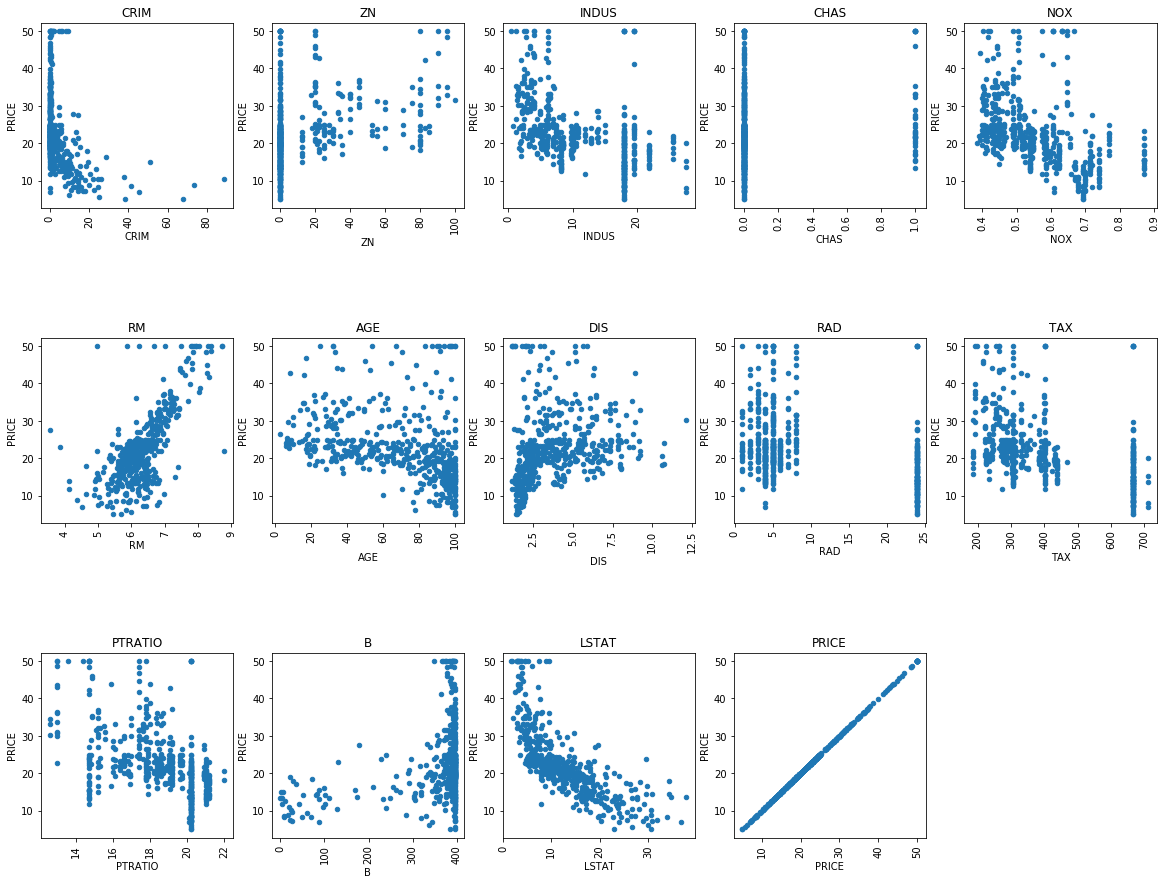

In [5]:
from matplotlib import pyplot as plt
from math import ceil

fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(bos.shape[1]) / cols)
for i, column in enumerate(bos.columns):
    axs = fig.add_subplot(rows, cols, i + 1)
    axs.set_title(column)
    bos.plot(kind='scatter', x=column, y='PRICE', ax=axs)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

Build the model

In [7]:
# The column that we want to predict.
y_column = bos['PRICE']

# The columns that we will be making predictions with.
x_columns = bos.drop('PRICE', axis=1)

In [8]:
# split the data into training and test sets and scale the variables

X_train, X_test, y_train, y_test = train_test_split(x_columns, y_column, test_size = 0.3, random_state = 25)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
y_test = y_scaler.transform(y_test[:, None])[:, 0]

In [9]:
# Instantiate a random forest regressor since we have to predic on continous variables, and fit the training set

model = RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\sanjesha\Documents\PythonScripts\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
y_pred = model.predict(X_test)
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f'))

Test Accuracy: 82.56 %
Mean Squared Error: 0.14877


Perform GridSerach to tune the hyper parameters, then use the best estimator for scoring on the test set.

In [11]:
parameters = {"min_samples_split": [2, 5, 10],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 3, 5],
              "max_features": ['auto', 'sqrt', 'log2'],
              "n_estimators": [50, 75, 100]
              }

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters set found on development set:\n")
print(grid_search.best_params_)

C:\Users\sanjesha\Documents\PythonScripts\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   41.7s


Best parameters set found on development set:

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:   50.9s finished


In [12]:
print("Accuracy for test data set:\n")
y_pred = grid_search.predict(X_test)
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f'))

Accuracy for test data set:

Test Accuracy: 87.38 %
Mean Squared Error: 0.10765


Accuaracy score has increased by 2% after tuning the hyper parameters and mean squared error is reduced from 0.13 to 0.11.